In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Pull CSV file and group data

In [4]:
# Read CSV file and show summary
game_data = pd.read_csv("Board-Games-Group-F.csv")
game_data.head()

,Unnamed: 0,id,name,year_published,min_players,max_players,primary_publisher,mechanics,num_user_ratings,average_user_rating,rank,num_mechs
0,0,oGVgRSAKwX,Carcassonne,2000,2.0,5.0,Hans im Glück,"['Tile Placement', 'Worker Placement']",547,3.436929,14,2
1,1,d7vHFjxM6M,Blokus,2000,2.0,4.0,Mattel Games,"['Area Enclosure', 'Hand Management', 'Tile Pl...",161,3.049689,221,3
2,2,uw69CrJFCL,Citadels: Classic,2000,2.0,8.0,Hans im Glück,"['Bluffing', 'Engine Building', 'Social Deduct...",132,3.310606,229,4
3,4,JyMsRC64I4,Go,2000,2.0,2.0,John N. Hansen Co.,['Area Enclosure'],82,3.329268,374,1
4,6,YD2fbRwJdz,Princes of Florence,2000,2.0,5.0,Rio Grande Games,['Tile Placement'],64,3.253385,487,1


In [5]:
# Group by year and display averages
yearly_average = game_data.groupby(["year_published"]).mean()
yearly_average

,Unnamed: 0,min_players,max_players,num_user_ratings,average_user_rating,rank,num_mechs
year_published,,,,,,,
2000,19.636364,2.000000,4.545455,60.318182,3.149476,4.545844e+06,2.500000
2001,112.062500,2.625000,5.375000,49.750000,3.053483,3.750502e+06,2.500000
2002,225.200000,2.371429,5.000000,29.571429,2.860815,6.857403e+06,3.085714
2003,329.483871,2.161290,4.419355,30.032258,2.981208,6.129330e+06,2.741935
2004,430.543478,2.195652,4.934783,54.673913,3.146967,5.217652e+06,3.152174
2005,531.788462,2.269231,5.326923,45.115385,3.141833,3.846607e+06,3.365385
2006,628.711111,2.111111,4.422222,30.888889,3.133318,5.111450e+06,3.177778
2007,739.301587,2.063492,4.873016,44.047619,3.099157,4.444818e+06,3.015873
2008,841.733333,2.133333,6.583333,52.216667,3.073000,6.000219e+06,3.216667


# Plot Average Number of Mechanics per Year

<IPython.core.display.Javascript object>


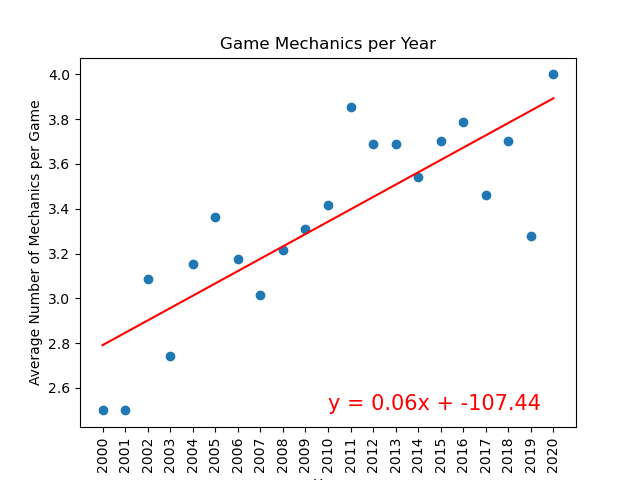

The r-value between both factors is 0.82.


In [16]:
# Determine tick locations and values
tick_locations = range(2000, 2021, 1)
x_values = range(2000, 2021, 1)
y_values = yearly_average['num_mechs']

# Determine r-value and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2010,2.5),fontsize=15,color="red")

# Add labels
plt.xticks(tick_locations, rotation='vertical')
plt.title('Game Mechanics per Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Mechanics per Game')
print(f"The r-value between both factors is {round(rvalue,2)}.")
plt.show()